## Modelos y Simulación – Trabajo Práctico 2

## Ensayos de Hipótesis para Medias 

**Autor: Cátedra – Modelos y Simulación - Facultad de Ingeniería - UCA**     
**Fecha: 2025-08-09**   
**Documento: MS_TP2A_Ensayos de Hipótesis_Medias_R1.ipynb**   
### Temas: Ensayo con varianza conocida (Z-test). Ensayo con varianza desconocida (t de Student). Determinación del tamaño muestral.
####  Contexto: en los trabajos prácticos trabajaremos con ejemplos relacionados con actividades de producción. El objetivo es relacionar la teoría y los trabajos prácticos con temas productivos.

#### Requisitos:
- Ver README.md en reposiorio: https://github.com/UCA-Facultad-de-Ingenieria-Clases-2025/MyS/blob/main/README.md   
- Instalar venv y llamarlo venvmys
- Registrar el kernel en venvmys   
- Usar directorio con el siguiente nombre: ../MyS/
- A continuación indicar paquetes necesarios indicados en requirements.txt

In [3]:
import sys, ipykernel, platform
print("Python:", sys.executable)
print("ipykernel:", ipykernel.__file__)
print("Version:", platform.python_version())


Python: /home/javier/Documents/GitRepo/UCA/MyS/venvmys/bin/python
ipykernel: /home/javier/Documents/GitRepo/UCA/MyS/venvmys/lib/python3.10/site-packages/ipykernel/__init__.py
Version: 3.10.12


#### Paquetes necesarios (verificar siempre con requirements.txt por si falta alguno)
#### Se recomienda instalarlos desde el notebook (cambiar esta celda de raw a code)
!which python
%pip install pandas
%pip install matplotlib
%pip install numpy    
%pip install scipy

### Ensayos de Hipótesis para Medias.

#### Ensayo Z con σ conocida para controlar el peso de cajas de cereales (500 g), con simulación de datos, cálculo paso a paso y tres gráficas:

- Simular una muestra (para el ejemplo) con μreal=498
- Calcular Z, p-valor, zα y el umbral crítico de xˉ.
- Graficar:
  - Normal estándar con región crítica y Z observado.
  - Histograma de la muestra con líneas en μ0 y xˉ.
  - Curva de potencia 1−β vs μ.
- CSV:
  - muestra_cajas_cereales.csv
  - resumen_ensayo_z.csv (estadísticos del test)

##### Hipótesis (unilateral izquierda)
$H_0:\ \mu=\mu_0 \qquad\text{vs}\qquad H_1:\ \mu<\mu_0$

##### Estadístico de prueba
$Z = \frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}$

##### Regla de decisión
$Rechazar H_0 si Z \le z_\alpha, \quad z_\alpha = \Phi^{-1}(\alpha).$

$\Phi^{-1}(\alpha).$ cuantil α de la distribución normal estándar o inversa de la CDF, el valor de 
z tal que la probabilidad acumulada hasta allí es α.

- La CDF de una variable aleatoria ZZ nos dice qué probabilidad acumulada hay hasta un cierto valor.
- Empieza en 0, va sumando probabilidades, y cuando llega al punto de interés dice qué fracción del total está a la izquierda de ese valor.
- Cuando hacemos un test Z, necesitamos decidir si un valor es “tan extremo” que es poco probable bajo la hipótesis nula. Usamos la CDF inversa (Φ−1(α)) para encontrar el punto de corte que deja exactamente un área α en la cola. Ese punto de corte es el valor crítico: si el estadístico cae más allá de ese valor → rechazamos la hipótesis nula.

$\Phi^{-1}(0.05)=-1.645$ de tablas o Python

In [5]:
from scipy.stats import norm

alpha = 0.05
z_alpha = norm.ppf(alpha)   # percent point function (inversa de la CDF)
print(z_alpha)


-1.6448536269514729


##### Si lo expresamos en términos de la media muestral
$\bar{X} \le \mu_0 + z_\alpha \cdot \frac{\sigma}{\sqrt{n}}$

##### p-valor (cola izquierda)
$p-valor = P(Z \le z_{obs}) = \Phi(z_{obs}).$
- Es la probabilidad de observar un valor tan extremo como el calculado, suponiendo que H0 es cierta.
  Es la probabilidad de que la variable Z sea menor o igual que z.
- El p-valor es un caso particular de la CDF (o de su complemento), aplicado al estadístico de prueba en un contexto de hipótesis”.

##### Potencia para μ1 (diseño muestral)
$Potencia(\mu_1) = Φ( ( μ0 + z_α·σ/√n − μ1 ) / (σ/√n) ).$


#### Resultado
- n=36, σ=8 g,α=0.05, μ0=500 g.
- xˉ=498.922, SE=1.333 g, Zobs=−0.809.
- zα=−1.645, umbral crítico para xˉ:497.807 g.
- Decisión: No rechazar H0 (no hay evidencia suficiente de subllenado al 5%).

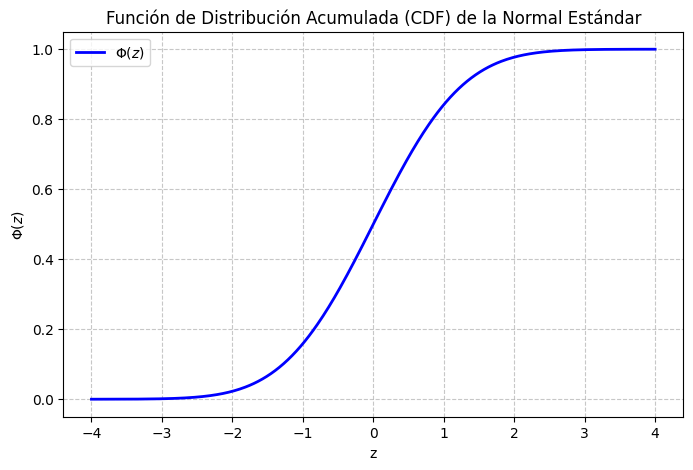

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Rango de valores para z
z_vals = np.linspace(-4, 4, 400)

# CDF de la normal estándar
cdf_vals = norm.cdf(z_vals)

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(z_vals, cdf_vals, linewidth=2, color="blue", label=r"$\Phi(z)$")
plt.title("Función de Distribución Acumulada (CDF) de la Normal Estándar")
plt.xlabel("z")
plt.ylabel(r"$\Phi(z)$")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()


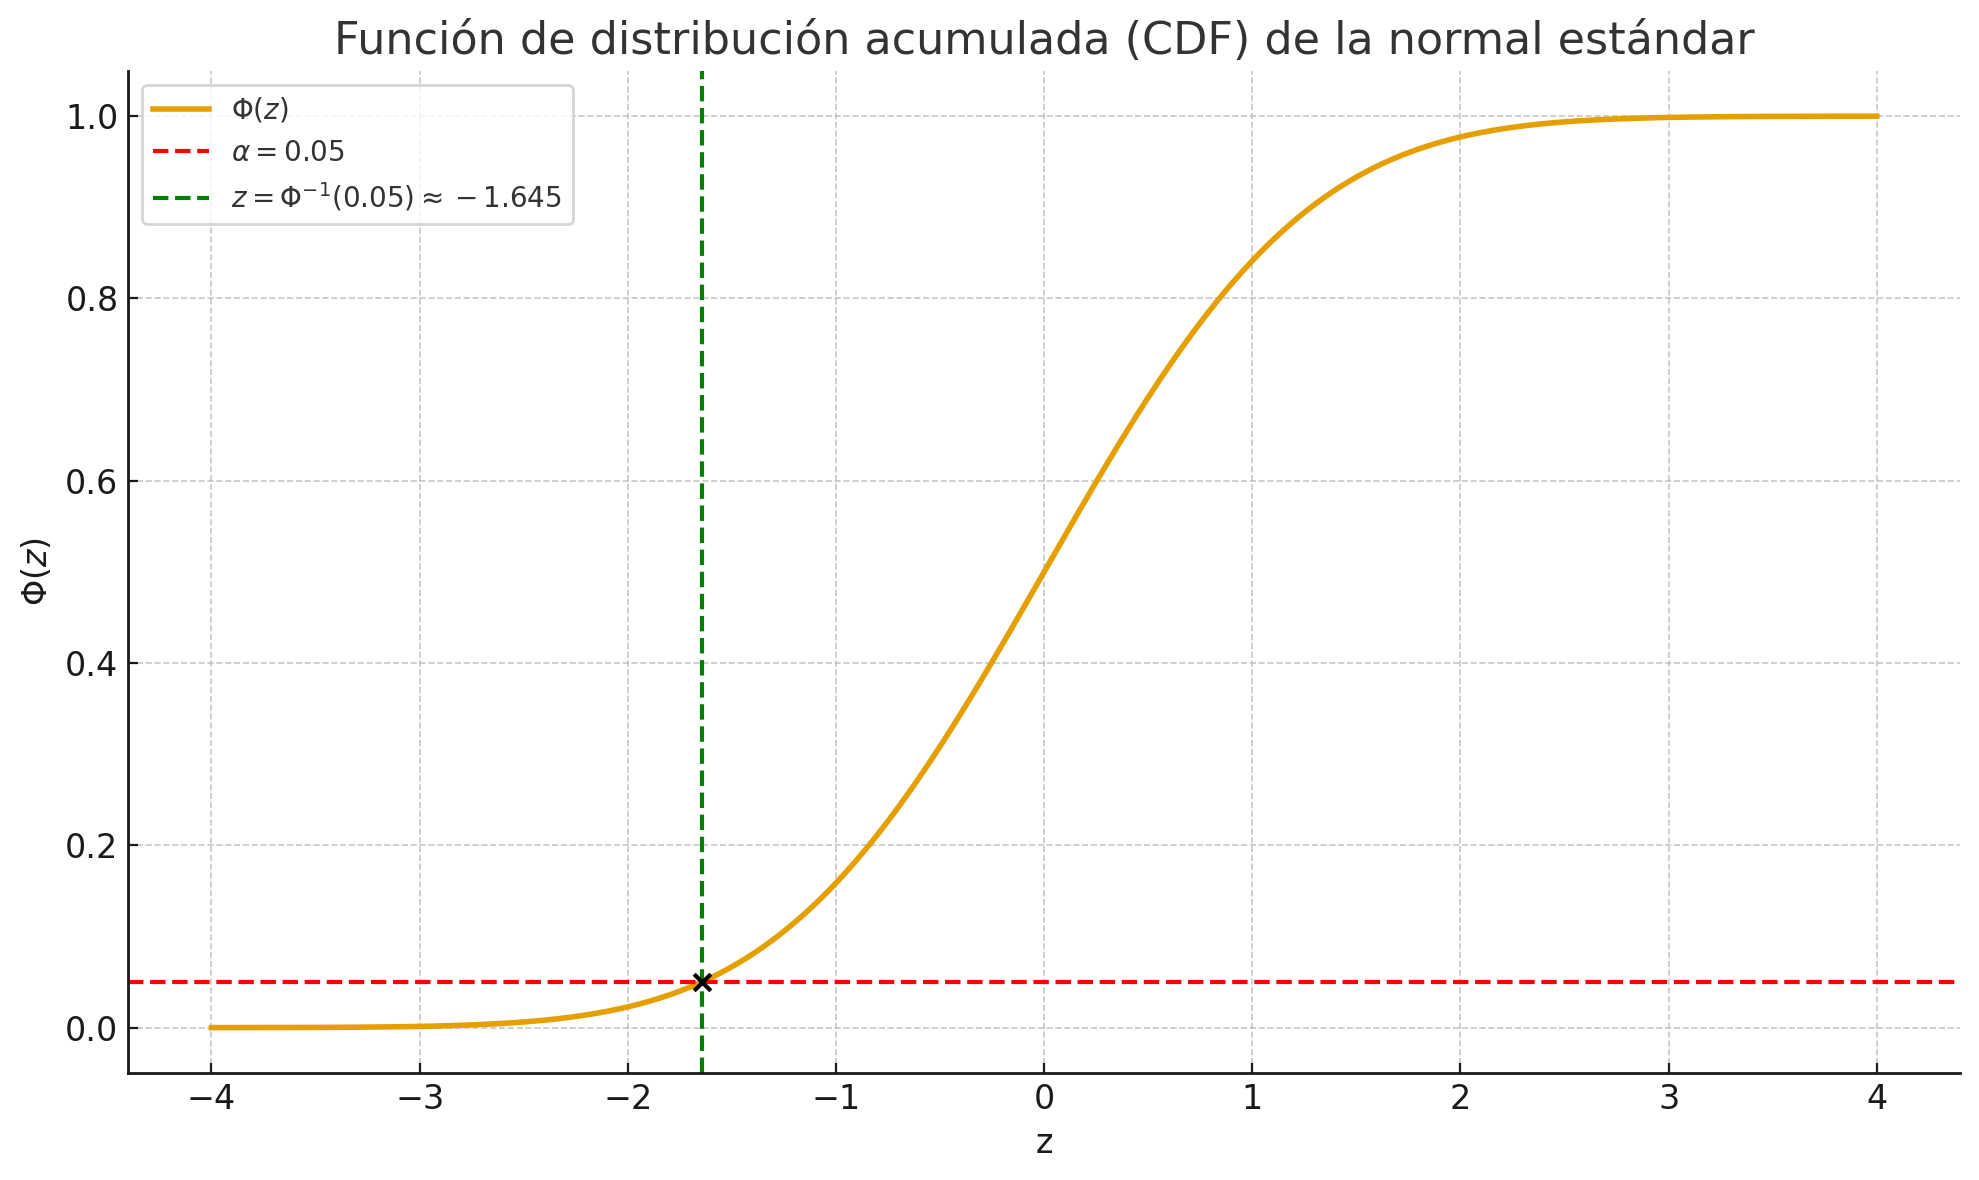

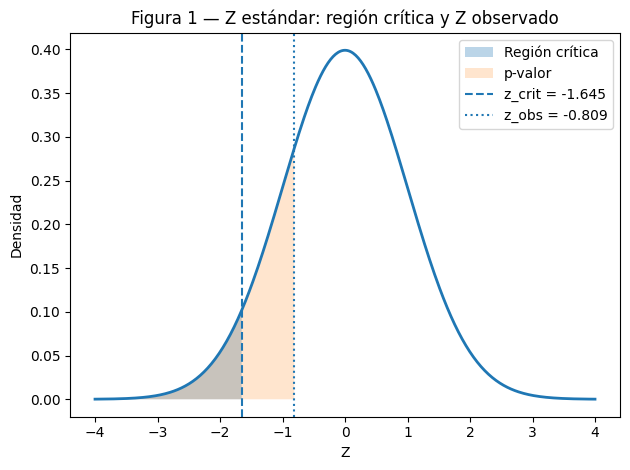

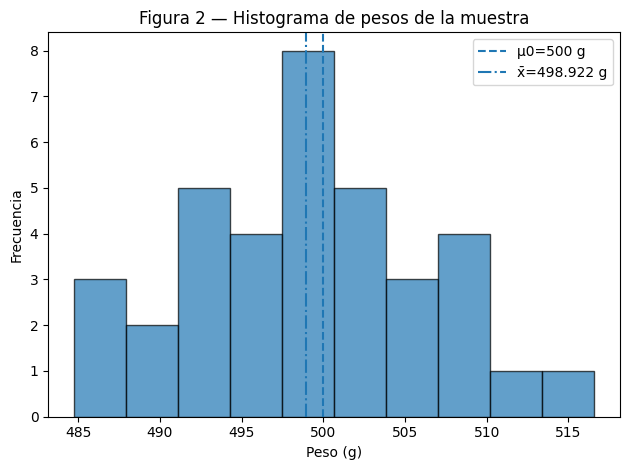

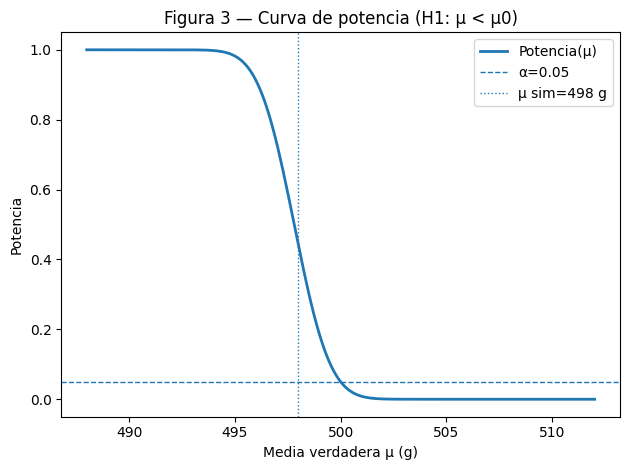

=== RESUMEN ENSAYO Z (σ conocida) ===
Hipótesis: H0: μ = 500.0 g  vs  H1: μ < 500.0 g (cola izquierda)
n = 36, σ = 8.0 g, α = 0.05
x̄ = 498.922 g,  SE = 1.333 g
Z observado = -0.809
p-valor (unilateral) = 0.20940
Z crítico = -1.645
Umbral crítico para x̄: 497.807 g  (rechazar si x̄ ≤ este valor)
Decisión: NO RECHAZAR H0 (sin evidencia suficiente de subllenado)

Archivos creados:
- salidas_ensayo_z/muestra_cajas_cereales.csv
- salidas_ensayo_z/resumen_ensayo_z.csv
- salidas_ensayo_z/fig1_z_region_critica.png
- salidas_ensayo_z/fig2_histograma_muestra.png
- salidas_ensayo_z/fig3_curva_potencia.png


In [2]:
# Ensayo Z (σ conocida) — Control de peso en cajas de cereales
# - Calcula Z, p-valor, z_crit y umbral crítico para x̄
# - Grafica: (1) Normal estándar con región crítica y Z obs
#            (2) Histograma de la muestra con μ0 y x̄
#            (3) Curva de potencia para H1: μ < μ0
# - Exporta CSV con la muestra simulada y un CSV con el resumen del test
#
# Requisitos: numpy, pandas, matplotlib, scipy

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# ----------------------------- Parámetros -----------------------------
mu0   = 500.0       # media declarada (H0)
sigma = 8.0         # desvío estándar poblacional conocido
alpha = 0.05        # nivel de significancia
n     = 36          # tamaño muestral
mu_true = 498.0     # media verdadera para simular datos (solo ejemplo)
seed  = 20250901    # semilla reproducible
out_dir = "salidas_ensayo_z"  # carpeta de salida (creada si no existe)

# ---------------------- Simulación de la muestra ----------------------
# (En tu caso real, reemplazá esta sección leyendo tu CSV de mediciones)
# Ejemplo de lectura real:
# df = pd.read_csv("pesos_reales.csv")  # debe tener una col 'peso_g'
# muestra = df["peso_g"].to_numpy()
rng = np.random.default_rng(seed)
muestra = rng.normal(loc=mu_true, scale=sigma, size=n)

# ---------------------- Cálculos del ensayo Z -------------------------
xbar = float(np.mean(muestra))
se   = sigma / np.sqrt(n)
z_obs = (xbar - mu0) / se
p_value = stats.norm.cdf(z_obs)        # unilateral izquierda
z_crit  = stats.norm.ppf(alpha)
xbar_crit = mu0 + z_crit * se          # umbral crítico para x̄
rechazar = z_obs <= z_crit

# ------------------------- Curva de potencia --------------------------
# Potencia(μ1) = P(rechazar | μ=μ1) = Φ((xbar_crit - μ1)/SE)
mu_grid = np.linspace(mu0 - 12, mu0 + 12, 200)
power = stats.norm.cdf((xbar_crit - mu_grid) / se)

# ------------------------ Guardado de resultados ----------------------
os.makedirs(out_dir, exist_ok=True)
csv_muestra = os.path.join(out_dir, "muestra_cajas_cereales.csv")
csv_resumen = os.path.join(out_dir, "resumen_ensayo_z.csv")

pd.DataFrame({"peso_g": muestra}).to_csv(csv_muestra, index=False)
pd.DataFrame([{
    "mu0_g": mu0,
    "sigma_g": sigma,
    "alpha": alpha,
    "n": n,
    "xbar_g": round(xbar, 4),
    "SE_g": round(se, 4),
    "z_obs": round(z_obs, 4),
    "z_crit": round(z_crit, 4),
    "p_value": round(float(p_value), 6),
    "xbar_crit_g": round(float(xbar_crit), 4),
    "decision": "RECHAZAR H0" if rechazar else "NO RECHAZAR H0"
}]).to_csv(csv_resumen, index=False)

# ------------------------------ Gráficos ------------------------------
# (1) Z estándar con región crítica y p-valor
z_vals = np.linspace(-4, 4, 400)
pdf = stats.norm.pdf(z_vals)

plt.figure()
plt.plot(z_vals, pdf, linewidth=2)
mask_crit = z_vals <= z_crit
plt.fill_between(z_vals[mask_crit], 0, pdf[mask_crit], alpha=0.3, label="Región crítica")
mask_p = z_vals <= z_obs
plt.fill_between(z_vals[mask_p], 0, pdf[mask_p], alpha=0.2, label="p-valor")
plt.axvline(z_crit, linestyle="--", linewidth=1.5, label=f"z_crit = {z_crit:.3f}")
plt.axvline(z_obs,  linestyle=":",  linewidth=1.5, label=f"z_obs = {z_obs:.3f}")
plt.title("Figura 1 — Z estándar: región crítica y Z observado")
plt.xlabel("Z"); plt.ylabel("Densidad"); plt.legend()
plt.tight_layout()
fig1 = os.path.join(out_dir, "fig1_z_region_critica.png")
plt.savefig(fig1, dpi=150)
plt.show()

# (2) Histograma de la muestra con μ0 y x̄
plt.figure()
plt.hist(muestra, bins=10, edgecolor="black", alpha=0.7)
plt.axvline(mu0,  linestyle="--", linewidth=1.5, label=f"μ0={mu0:g} g")
plt.axvline(xbar, linestyle="-.", linewidth=1.5, label=f"x̄={xbar:.3f} g")
plt.title("Figura 2 — Histograma de pesos de la muestra")
plt.xlabel("Peso (g)"); plt.ylabel("Frecuencia"); plt.legend()
plt.tight_layout()
fig2 = os.path.join(out_dir, "fig2_histograma_muestra.png")
plt.savefig(fig2, dpi=150)
plt.show()

# (3) Curva de potencia
plt.figure()
plt.plot(mu_grid, power, linewidth=2, label="Potencia(μ)")
plt.axhline(alpha, linestyle="--", linewidth=1.0, label=f"α={alpha}")
plt.axvline(mu_true, linestyle=":", linewidth=1.0, label=f"μ sim={mu_true:g} g")
plt.title("Figura 3 — Curva de potencia (H1: μ < μ0)")
plt.xlabel("Media verdadera μ (g)"); plt.ylabel("Potencia"); plt.legend()
plt.tight_layout()
fig3 = os.path.join(out_dir, "fig3_curva_potencia.png")
plt.savefig(fig3, dpi=150)
plt.show()

# ---------------------------- Resumen texto ---------------------------
print("=== RESUMEN ENSAYO Z (σ conocida) ===")
print(f"Hipótesis: H0: μ = {mu0} g  vs  H1: μ < {mu0} g (cola izquierda)")
print(f"n = {n}, σ = {sigma} g, α = {alpha}")
print(f"x̄ = {xbar:.3f} g,  SE = {se:.3f} g")
print(f"Z observado = {z_obs:.3f}")
print(f"p-valor (unilateral) = {float(p_value):.5f}")
print(f"Z crítico = {z_crit:.3f}")
print(f"Umbral crítico para x̄: {xbar_crit:.3f} g  (rechazar si x̄ ≤ este valor)")
print("Decisión:", "RECHAZAR H0 (evidencia de subllenado)" if rechazar else "NO RECHAZAR H0 (sin evidencia suficiente de subllenado)")
print("\nArchivos creados:")
print(f"- {csv_muestra}")
print(f"- {csv_resumen}")
print(f"- {fig1}")
print(f"- {fig2}")
print(f"- {fig3}")



### Inferencia sobre Proporciones y Control de Calidad.
### Norma IRAM 15
#### Ejemplo sobre Steel Frame: ensayos sobre el espesor galvanizado de perfiles. 
- Tenemos un lote de 5000 perfiles, AQL = 1.5%. AQL (Acceptance Quality Level): nivel máximo de defectos tolerable para aceptar un lote.
- Norma indica tomar muestra de n=200.
- Criterio: aceptar lote si la cantidad de defectuosos es ≤5.

- Tamaño de lote: $N = 5000$
- Elegir nivel de inspección:
  - Supongamos Nivel II normal → la tabla IRAM/ISO indica n = 200 muestras.
- Cálculo del número de aceptación (c):
  - Con $AQL = 1,5%$ → la tabla da $c = 5$.
- Inspección:
- Se seleccionan 200 perfiles al azar y se miden los espesores.
  - Si defectuosos ≤ 5 → lote aceptado.
  - Si defectuosos ≥ 6 → lote rechazado.

In [7]:
import numpy as np

# Datos
N = 5000        # tamaño de lote
n = 200         # muestra según IRAM 15-1
AQL = 0.015     # 1.5%
c = 5           # número máximo de defectos permitido

# Supongamos que la tasa real de defectuosos del lote es 1.2%
p_def = 0.012

# Simulación: muestreamos 200 piezas (0 = ok, 1 = defectuosa)
muestra = np.random.choice([0, 1], size=n, p=[1-p_def, p_def])
defectuosos = np.sum(muestra)

print(f"Defectuosos encontrados: {defectuosos}")
if defectuosos <= c:
    print("Lote ACEPTADO")
else:
    print("Lote RECHAZADO")


Defectuosos encontrados: 2
Lote ACEPTADO


- Ejemplo de cálculo de binomial   
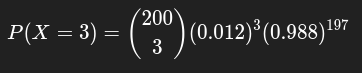


In [8]:
import math

n = 200
p = 0.012
k = 3

# coeficiente binomial
coef = math.comb(n, k)

# probabilidad
px = coef * (p**k) * ((1-p)**(n-k))
print(f"P(X=3) = {px:.6f}")


P(X=3) = 0.210406


#### Calculo manual de la binomial

Calcular la probabilidad de que en una muestra de $n=5$ piezas,
con probabilidad de defecto $p=0.1$, aparezcan exactamente $k=2$ defectuosas.

La fórmula general es:
$$
P(X = k) = \binom{n}{k} \, p^k (1-p)^{n-k}
$$

- Paso 1: Calcular el coeficiente binomial
$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

- Con $n=5$ y $k=2$:
$$
\binom{5}{2} = \frac{5!}{2!(5-2)!} = \frac{120}{2 \cdot 6} = 10
$$

- Paso 2: Calcular la parte de éxitos
$$
p^k = (0.1)^2 = 0.01
$$

- Paso 3: Calcular la parte de fracasos
$$
(1-p)^{n-k} = (0.9)^{5-2} = (0.9)^3 = 0.729
$$

- Paso 4: Multiplicar todo
$$
P(X=2) = 10 \cdot 0.01 \cdot 0.729
$$

- Resultado:
$$
P(X=2) = 0.0729 \quad \Rightarrow \quad 7.29\%
$$


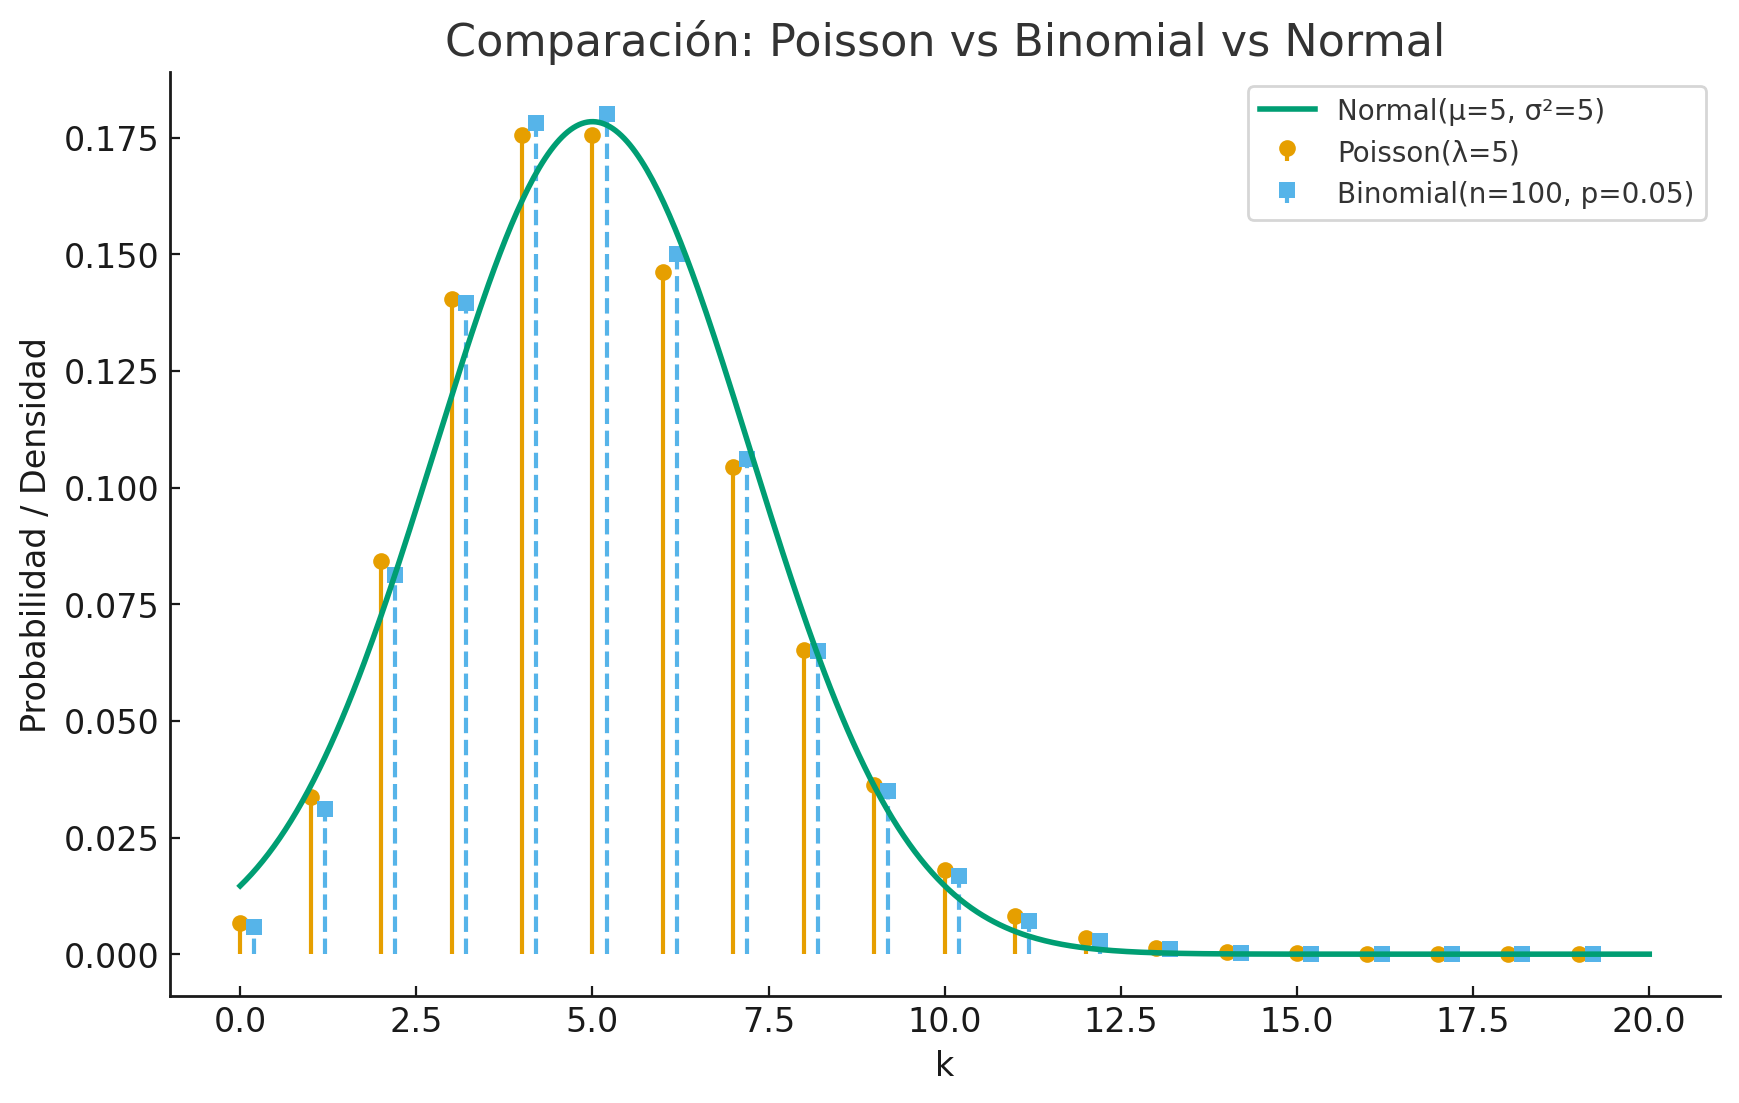


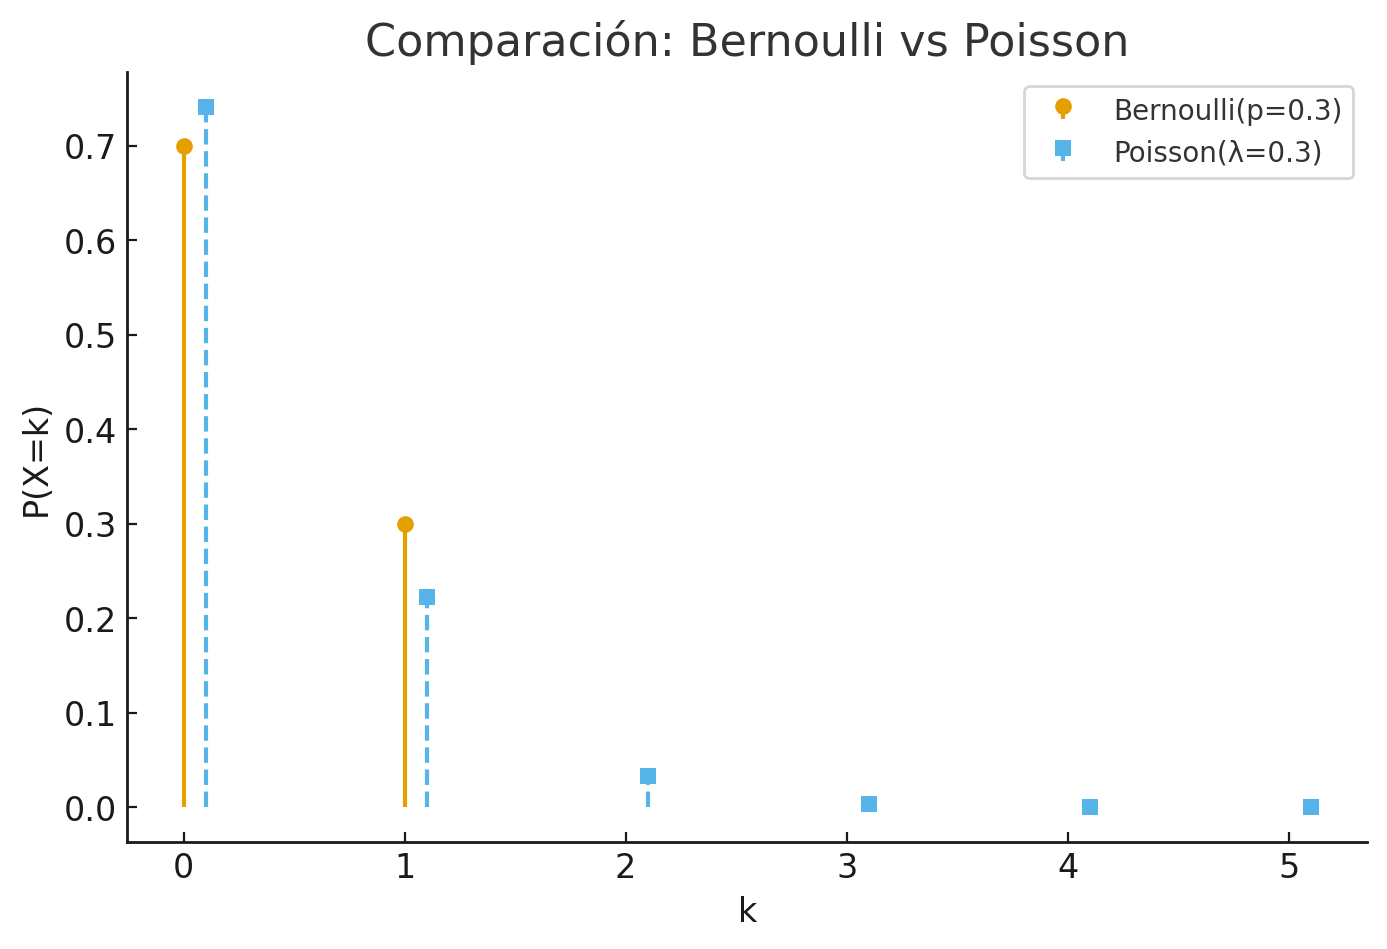

- 🔵 Bernoulli(0.3) → solo admite dos valores:
P(X=0)=0.7
P(X=1)=0.3

- 🟠 Poisson(λ=0.3) → admite infinitos valores (k=0,1,2,…), pero la mayor probabilidad está en k=0 y k=1